# Import packages

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

In [ ]:
# Predicted output from all 12 SG-NEx samples
data = pd.read_csv('combined_preds.csv')
data

,transcriptId,transcriptPosition,prob_score,value_score,v1,v2,v3,v4,v5,v6,v7,v8,v9
0,ENST00000000233,244,0.055810,0,0.007508,3.651206,122.913953,0.008808,7.602272,125.881395,0.006921,4.104250,80.413953
1,ENST00000000233,261,0.075822,0,0.006349,3.278738,108.936957,0.006346,3.196754,108.713043,0.006464,2.905755,94.660870
2,ENST00000000233,316,0.048690,0,0.006867,2.751946,105.810417,0.007035,3.441285,99.585417,0.007406,2.095090,89.722917
3,ENST00000000233,332,0.744217,1,0.009808,6.241867,129.901961,0.008623,2.834246,98.135294,0.006187,2.190624,90.098039
4,ENST00000000233,368,0.694748,1,0.010308,6.118964,118.431373,0.011881,5.924688,122.358824,0.009710,4.121768,85.350980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15996964,ENST00000642143,585,0.153571,0,0.005980,3.084000,107.300000,0.007300,7.097000,120.200000,0.005980,2.805000,75.800000
15996965,ENST00000642143,689,0.007992,0,0.003980,2.021000,87.600000,0.011620,3.100000,93.900000,0.002660,1.232000,87.400000
15996966,ENST00000642143,726,0.015724,0,0.003650,1.376000,89.800000,0.004428,1.794362,95.300000,0.007849,2.068636,89.200000
15996967,ENST00000642143,866,0.000516,0,0.001990,2.454000,100.400000,0.007300,1.664000,90.800000,0.003404,1.445621,87.200000


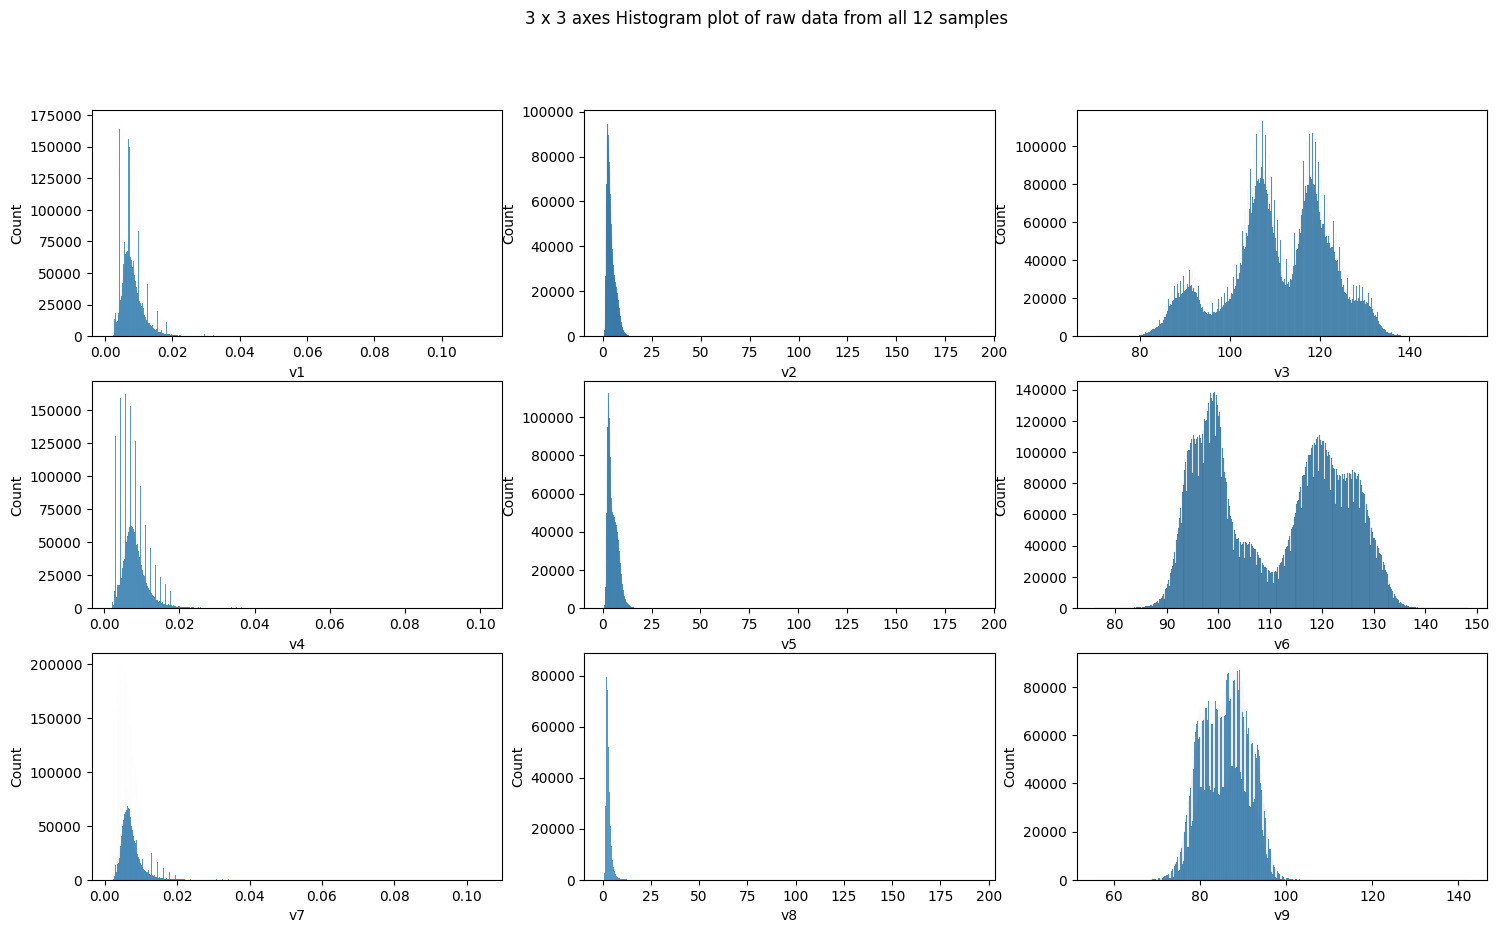

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
 
fig.suptitle('3 x 3 axes Histogram plot of raw data from all 12 samples')
 
sns.histplot(ax=axes[0, 0], data=data, x='v1')
sns.histplot(ax=axes[0, 2], data=data, x='v3')
sns.histplot(ax=axes[1, 0], data=data, x='v4')
sns.histplot(ax=axes[0, 1], data=data, x='v2')
sns.histplot(ax=axes[1, 1], data=data, x='v5')
sns.histplot(ax=axes[1, 2], data=data, x='v6')
sns.histplot(ax=axes[2, 0], data=data, x='v7')
sns.histplot(ax=axes[2, 1], data=data, x='v8')
sns.histplot(ax=axes[2, 2], data=data, x='v9')
plt.show()
# plt.savefig('Distribution of v1-v9 raw data.png')

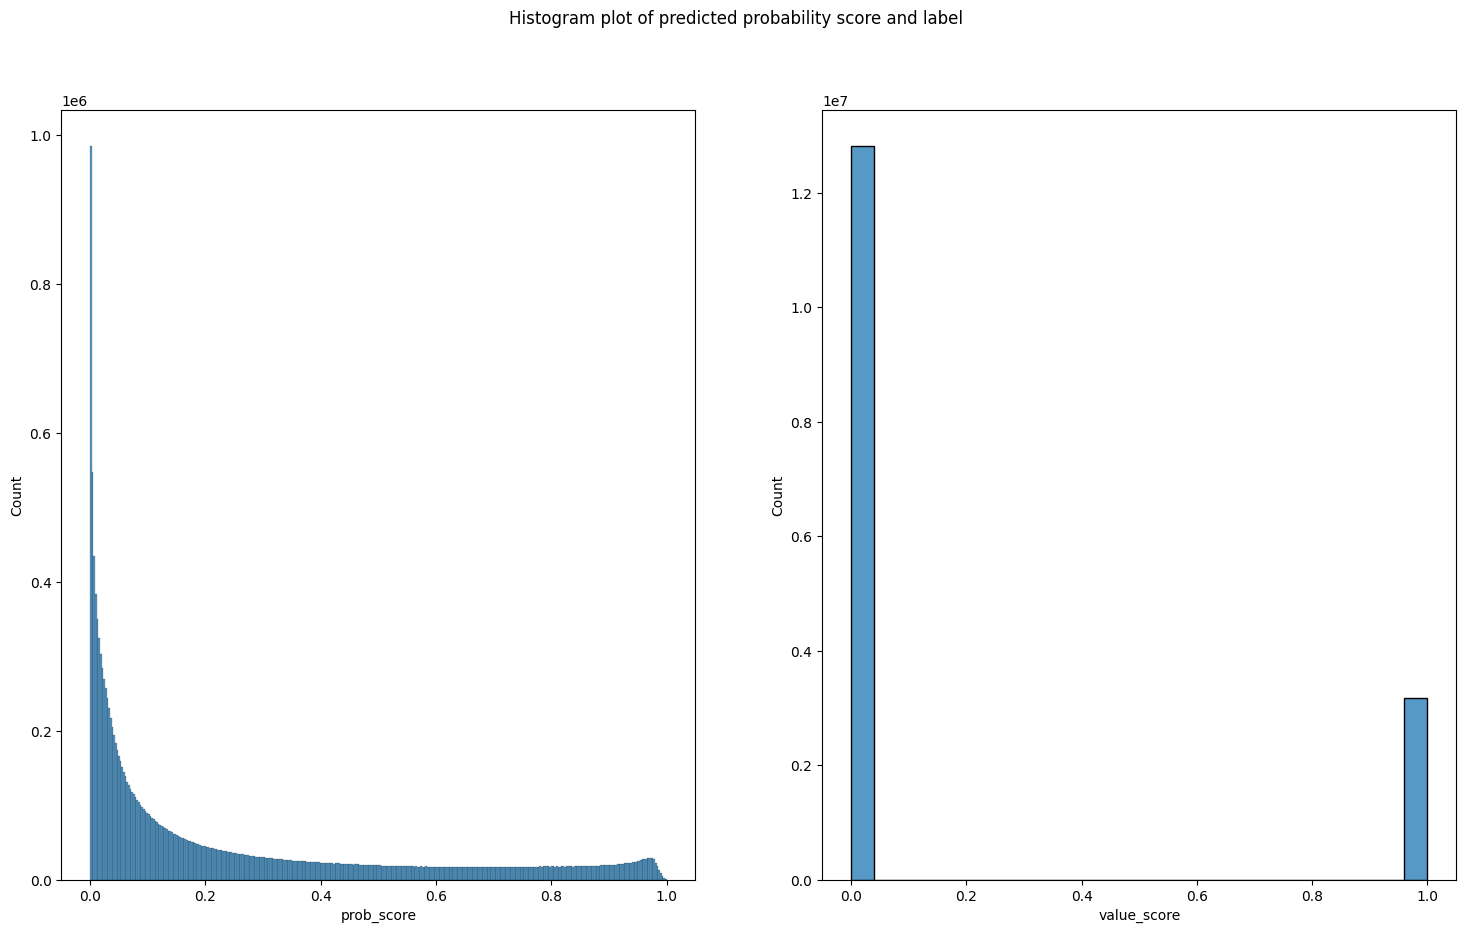

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
 
fig.suptitle('Histogram plot of predicted probability score and label')
 
sns.histplot(ax=axes[0], data=data, x='prob_score')
sns.histplot(ax=axes[1], data=data, x='value_score')

plt.show()
# plt.savefig('Histogram of all results.png')

In [ ]:
percent10 = round(0.1*len(data)) 
highest_prob = data.sort_values(by='prob_score', ascending=[False]).head(percent10)
lowest_prob = data.sort_values(by='prob_score').head(percent10)

In [ ]:
# t test: determine whether 2 dataframes are statistically significant in their means
stats.ttest_ind(highest_prob.iloc[:,4:], lowest_prob.iloc[:,4:])

Ttest_indResult(statistic=array([ -17.58601853,  519.70551204, 1063.84855255, -183.80502984,
         48.12532128,  944.41935128,   26.70243779,  229.74259258,
         34.10646933]), pvalue=array([3.17645559e-069, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 4.58896958e-157, 0.00000000e+000,
       6.57535622e-255]))

p value is the probability that occured by chance (random), lower p value means that the difference in means is significant. In our case, all p values are extremely low, signifying that the top 10% and lowest 10 % is different in their v1-v9 feature values

Compare mean of feature values between top 10% samples predicted to modify and bottom 10%

In [ ]:
lst = []
lst.append(highest_prob['v1'].mean())
lst.append(highest_prob['v2'].mean())
lst.append(highest_prob['v3'].mean())
lst.append(highest_prob['v4'].mean())
lst.append(highest_prob['v5'].mean())
lst.append(highest_prob['v6'].mean())
lst.append(highest_prob['v7'].mean())
lst.append(highest_prob['v8'].mean())
lst.append(highest_prob['v9'].mean())

In [ ]:
lst2 = []
lst2.append(lowest_prob['v1'].mean())
lst2.append(lowest_prob['v2'].mean())
lst2.append(lowest_prob['v3'].mean())
lst2.append(lowest_prob['v4'].mean())
lst2.append(lowest_prob['v5'].mean())
lst2.append(lowest_prob['v6'].mean())
lst2.append(lowest_prob['v7'].mean())
lst2.append(lowest_prob['v8'].mean())
lst2.append(lowest_prob['v9'].mean())

In [ ]:
lst3 = []
for i in range(len(lst)):
    lst3.append(abs(lst[i]-lst2[i]))

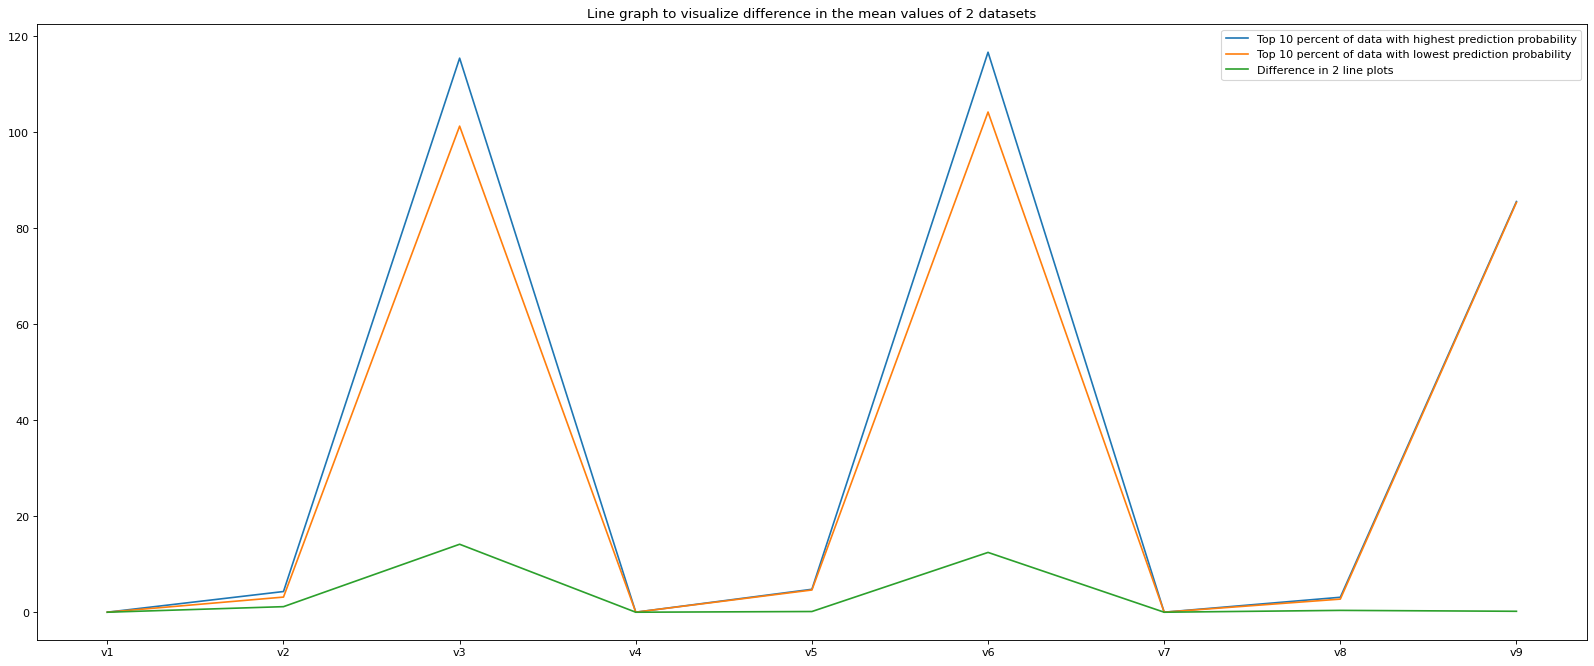

In [ ]:
figure(figsize=(25, 10), dpi=80)
x = ['v1','v2','v3','v4','v5','v6','v7','v8','v9']

# plot lines
plt.plot(x, lst, label = "Top 10 percent of data with highest prediction probability")
plt.plot(x, lst2, label = "Top 10 percent of data with lowest prediction probability")
plt.plot(x, lst3, label = "Difference in 2 line plots")
plt.legend()
plt.title("Line graph to visualize difference in the mean values of 2 datasets")
# plt.savefig('Difference in v1-v9 values.png')
plt.show()